# PERSONAL DATA

### **Nurkholiq Agani Hafid**

Instagram: [mecoliqnur](https://www.instagram.com/mecoliqnur/)

Portfolio:
* [LinkedIn](https://www.linkedin.com/in/nurkholiqaganihafid/)
* [GitHub](https://github.com/nurkholiqaganihafid)

# DESCRIPTION

Mengembangkan **model prediktif** untuk meningkatkan bisnis perusahaan, termasuk mengoptimalkan strategi bisnis dan melakukan analisis regresi dan clustering.
- Model Machine Learning Regression (Time Series): Memprediksi total quantity harian penjualan produk untuk merencanakan persediaan dan meningkatkan efisiensi bisnis.
- Model Machine Learning Clustering: Membuat cluster pelanggan dengan kesamaan tertentu untuk memahami pelanggan lebih baik dan merancang strategi pemasaran yang lebih efektif.

The data link contains each column's information: [Case Study - Legend](https://github.com/nurkholiqaganihafid/Kalbe_Nutritionals_Data_Scientist_Project/blob/main/content/Case%20Study%20-%20Legend.txt)

# DATA PREPARATION

## Libraries

In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

plt.rc('axes', grid=True)

%matplotlib inline

## Load Dataset

### Customer

In [3]:
customer = pd.read_csv('/content/Customer.csv', sep=';')
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


### Product

In [4]:
product = pd.read_csv('/content/Product.csv', sep=';')
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


### Store

In [5]:
store = pd.read_csv('/content/Store.csv', sep=';')
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


### Transaction

In [6]:
transaction = pd.read_csv('/content/Transaction.csv', sep=';')
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


## Cleaning Data

### Customer

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [8]:
customer.CustomerID.nunique()

447

In [9]:
total_duplicates = customer.duplicated().sum()
print('Total duplicates of customer:', total_duplicates)

Total duplicates of customer: 0


Merubah tipe data Income menjadi Float dan koma menjadi titik pada nilai pada kolom Income

In [10]:
customer['Income'] = customer['Income'].str.replace(',', '.').astype(float)

In [11]:
customer['Income']

0       5.12
1       6.23
2       9.17
3       4.87
4       3.57
       ...  
442     9.28
443    15.31
444    14.48
445     7.81
446    20.37
Name: Income, Length: 447, dtype: float64

### Product

In [12]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [13]:
product.ProductID.nunique()

10

In [14]:
total_duplicates = product.duplicated().sum()
print('Total duplicates of product:', total_duplicates)

Total duplicates of product: 0


### Store

In [15]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [16]:
store.StoreID.nunique()

14

In [17]:
total_duplicates = store.duplicated().sum()
print('Total duplicates of store:', total_duplicates)

Total duplicates of store: 0


Merubah tipe data Latitude dan Longitude menjadi Float dan nilai koma menjadi titik

In [18]:
store['Latitude'] = store['Latitude'].str.replace(',', '.').astype(float)
store['Longitude'] = store['Longitude'].str.replace(',', '.').astype(float)

In [19]:
store['Latitude'].head()

0   -6.200000
1   -6.914864
2   -7.797068
3   -6.966667
4   -7.250445
Name: Latitude, dtype: float64

In [20]:
store['Longitude'].head()

0    106.816666
1    107.608238
2    110.370529
3    110.416664
4    112.768845
Name: Longitude, dtype: float64

### Transaction

In [21]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [22]:
nunique_counts = transaction['TransactionID'].nunique()
nunique_counts

4908

- Outup pada nunique() pada kolom TransactionID tidak sama dengan index aslinya bahwa kolom tersebut terjadi duplikat

In [23]:
# Memfilter data yang memiliki jumlah nilai unik yang sama dengan 'nunique_counts'
result = transaction.groupby('TransactionID').filter(lambda x: x['TransactionID'].nunique() == nunique_counts)
print(result)

Empty DataFrame
Columns: [TransactionID, CustomerID, Date, ProductID, Price, Qty, TotalAmount, StoreID]
Index: []


In [24]:
# Mencetak semua baris yang memiliki duplikat di kolom TransactionID
duplicate_rows = transaction[transaction.duplicated(subset=['TransactionID'], keep=False)]
print(duplicate_rows)

     TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
6          TR54287          51  01/01/2022        P8  16000    2        32000   
17         TR26678         321  02/01/2022        P6  18000    3        54000   
21         TR34291         333  02/01/2022        P7   9400    2        18800   
52         TR41140          78  04/01/2022        P9  10000    2        20000   
74         TR84132          22  05/01/2022        P9  10000    7        70000   
...            ...         ...         ...       ...    ...  ...          ...   
4876       TR91651         197  21/12/2022        P5   4200    2         8400   
4910       TR57273         376  24/12/2022        P8  16000    1        16000   
4916       TR75968         209  24/12/2022        P9  10000    7        70000   
4921       TR18138         375  25/12/2022        P3   7500    6        45000   
5000       TR26924         161  30/12/2022        P4  12000    3        36000   

      StoreID  
6          

The last step, memastikan apakah data pada setiap kolom ada duplikat

In [25]:
total_duplicates = transaction.duplicated().sum()
print('Total duplicates of transaction:', total_duplicates)

Total duplicates of transaction: 0


- Setiap baris pada kolom Transaction tidak ada data duplikat

In [26]:
transaction.head(1)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12


Merubah tipe data Date menjadi datetime

In [27]:
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [28]:
transaction.dtypes

TransactionID            object
CustomerID                int64
Date             datetime64[ns]
ProductID                object
Price                     int64
Qty                       int64
TotalAmount               int64
StoreID                   int64
dtype: object

## Handling Missing Values

### Customer

In [29]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [30]:
customer.dropna(subset=['Marital Status'], inplace=True)

In [31]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

### Product

In [32]:
product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

### Store

In [33]:
product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

### Transaction

In [34]:
transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

## Merging All Data Frames

In [35]:
df = pd.merge(transaction, customer, on='CustomerID')
df.head(1)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53


In [36]:
df = pd.merge(df, product.drop(columns='Price'), on='ProductID')
df.head(1)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers


In [37]:
df = pd.merge(df, store, on='StoreID')
df.sample(2)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
2525,TR3136,395,2022-04-23,P3,7500,1,7500,3,28,0,Married,3.39,Crackers,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
429,TR79845,165,2022-05-01,P5,4200,4,16800,13,44,1,Married,14.58,Thai Tea,Buana,Buana,General Trade,-1.269160,116.825264


In [38]:
df.rename(columns={'TransactionID': 'transaction_id', 'CustomerID': 'customer_id',
                   'ProductID': 'product_id', 'TotalAmount': 'total_amount',
                   'StoreID': 'store_id', 'StoreName': 'store_name',
                   'GroupStore': 'group_store'}, inplace=True)
df.rename(columns=str.lower, inplace=True)
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

df.sample(1)

,transaction_id,customer_id,date,product_id,price,qty,total_amount,store_id,age,gender,marital_status,income,product_name,store_name,group_store,type,latitude,longitude
2144,TR55271,342,2022-12-24,P3,7500,1,7500,9,48,1,Married,13.55,Crackers,Lingga,Lingga,Modern Trade,-3.654703,128.190643


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  4976 non-null   object        
 1   customer_id     4976 non-null   int64         
 2   date            4976 non-null   datetime64[ns]
 3   product_id      4976 non-null   object        
 4   price           4976 non-null   int64         
 5   qty             4976 non-null   int64         
 6   total_amount    4976 non-null   int64         
 7   store_id        4976 non-null   int64         
 8   age             4976 non-null   int64         
 9   gender          4976 non-null   int64         
 10  marital_status  4976 non-null   object        
 11  income          4976 non-null   float64       
 12  product_name    4976 non-null   object        
 13  store_name      4976 non-null   object        
 14  group_store     4976 non-null   object        
 15  type

In [40]:
df.describe()

,customer_id,price,qty,total_amount,store_id,age,gender,income,latitude,longitude
count,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000
mean,220.597267,9690.293408,3.642484,32268.629421,7.492162,40.079582,0.448151,8.649224,-2.944228,109.602110
std,128.735807,4601.844969,1.855968,19661.512914,4.027835,12.862586,0.497354,6.536447,4.321477,8.368621
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,-7.797068,95.323753
25%,108.750000,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,4.250000,-6.914864,104.756554
50%,220.000000,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,7.720000,-5.135399,110.370529
75%,330.000000,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,10.840000,0.533505,114.590111
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,72.000000,1.000000,71.300000,5.548290,128.190643


# TIME SERIES REGRESSION

## Forecasting Data

In [41]:
df_forecast = df.groupby('date')[['qty']].sum()
df_forecast

,qty
date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,28
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


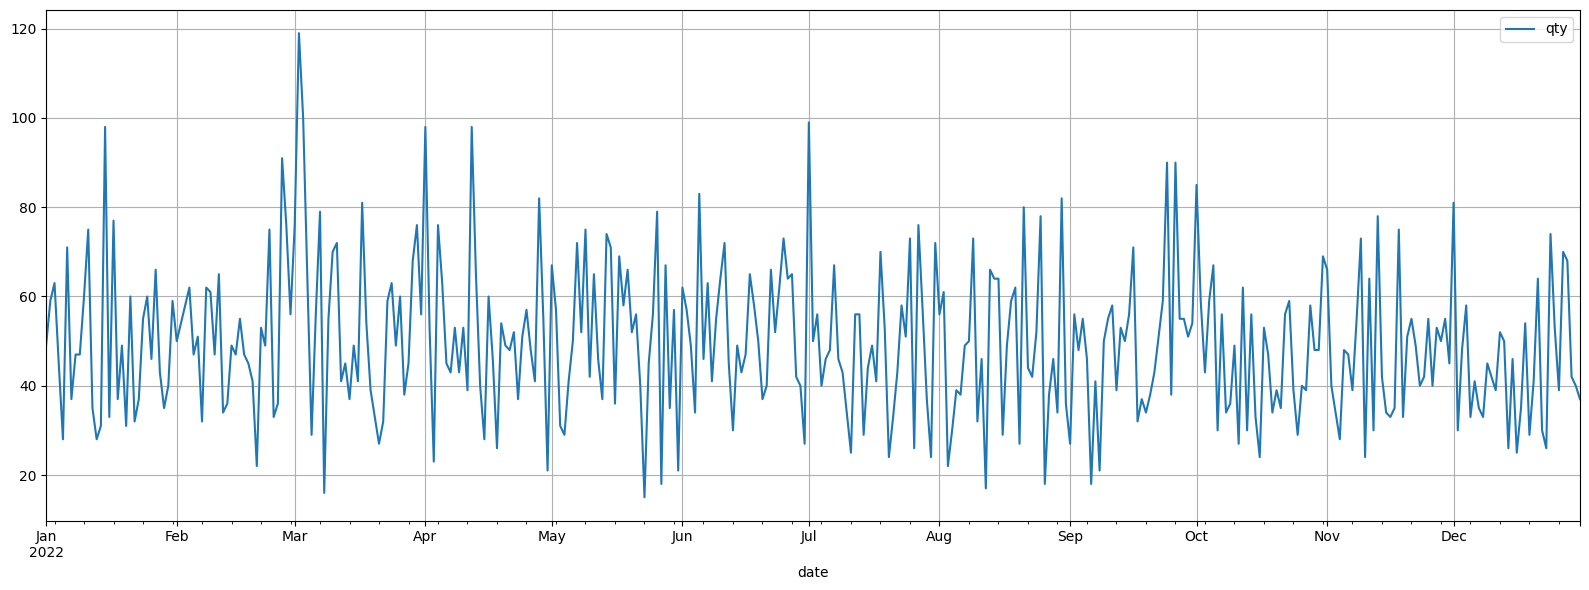

In [42]:
df_forecast.plot(figsize=(16,6))
plt.tight_layout()

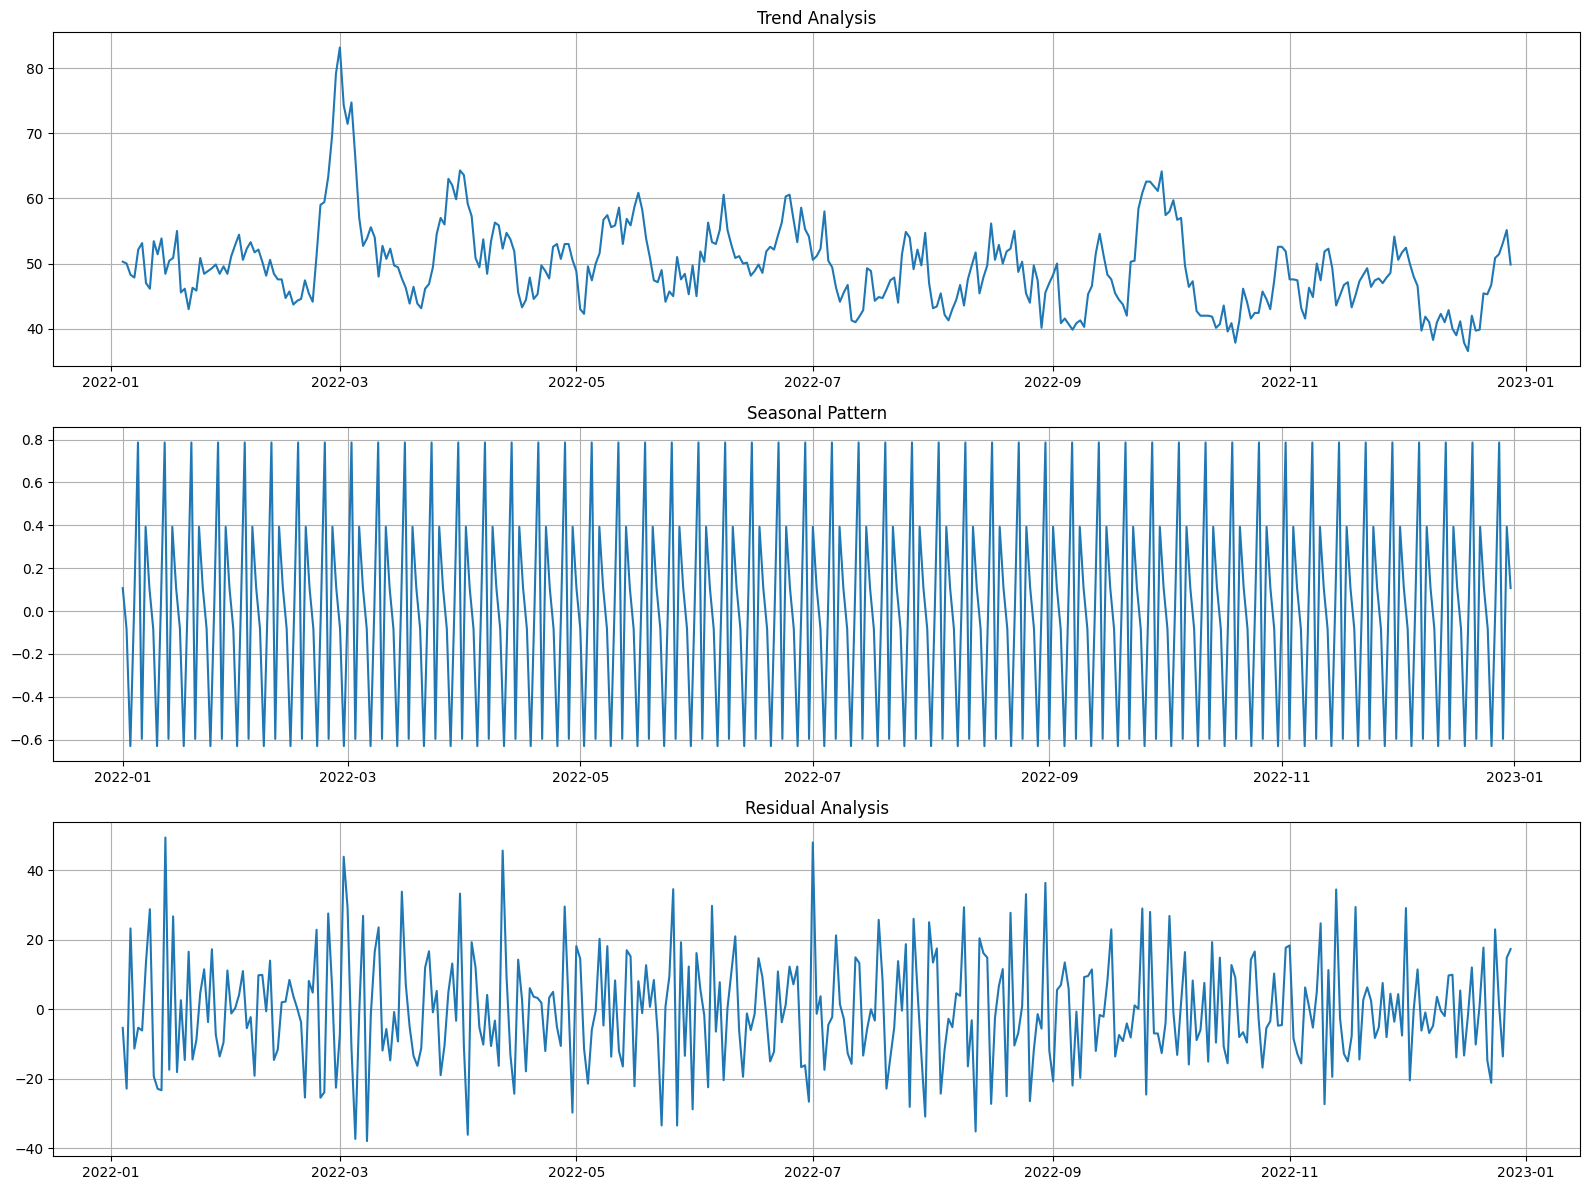

In [43]:
decompose = seasonal_decompose(df_forecast)

plt.figure(figsize=(16, 12))

plt.subplot(311)
plt.plot(decompose.trend)
plt.title('Trend Analysis')
plt.tight_layout()

plt.subplot(312)
plt.plot(decompose.seasonal)
plt.title('Seasonal Pattern')

plt.subplot(313)
plt.plot(decompose.resid)
plt.title('Residual Analysis')
plt.tight_layout()

## Checking Stationarity

In [44]:
def check_stationarity(timeseries):
    # Dickey-Fuller test:
    df_test = adfuller(timeseries, autolag='AIC')
    print(df_test)
    print()
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
      df_output['Critical Value (%s)'%key] = value
    print(df_output)

check_stationarity(df_forecast['qty'])

(-19.24830156679947, 0.0, 0, 364, {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}, 2936.890448392939)

Test Statistic                 -19.248302
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


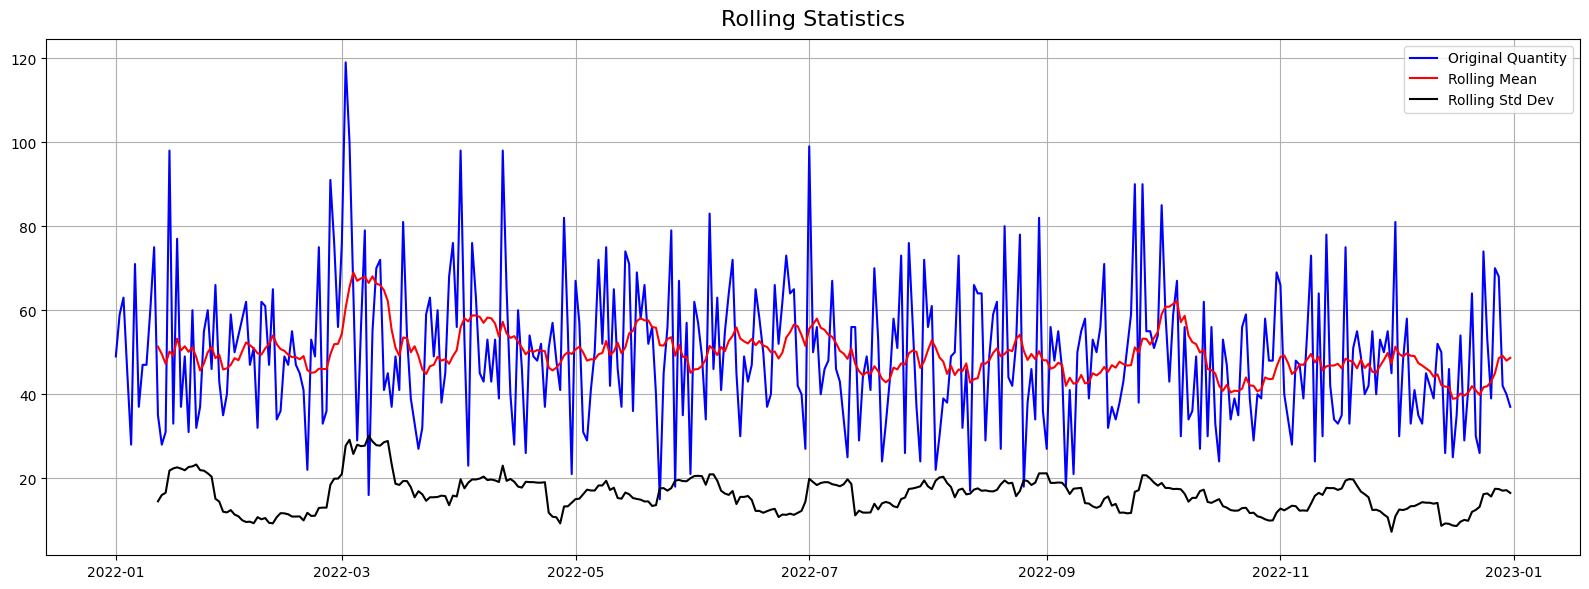

Dickey-Fuller Test:
Test Statistic: -19.24830156679947
P-value: 0.0
Number of Lags Used: 0
Number of Observations Used: 364
Critical Value (1%): -3.4484434475193777
Critical Value (5%): -2.869513170510808
Critical Value (10%): -2.571017574266393
Is Stationary: True
----------------------------------
Result: Time Series is stationary


In [45]:
def plot_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    plt.figure(figsize=(16, 6))
    plt.plot(timeseries, color='blue', label='Original Quantity')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std Dev')
    plt.title('Rolling Statistics', fontsize=16, pad=10)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Dickey-Fuller test:
    result = adfuller(timeseries, autolag='AIC')
    print('Dickey-Fuller Test:')
    print(f'Test Statistic: {result[0]}')
    print(f'P-value: {result[1]}')
    print(f'Number of Lags Used: {result[2]}')
    print(f'Number of Observations Used: {result[3]}')
    print(f'Critical Value (1%): {result[4]["1%"]}')
    print(f'Critical Value (5%): {result[4]["5%"]}')
    print(f'Critical Value (10%): {result[4]["10%"]}')
    print(f'Is Stationary: {result[1] < 0.05}')
    print('----------------------------------')

    if result[1] < 0.05:
      print('Result: Time Series is stationary')
    else:
      print('Result: Time Series is non-stationary')

plot_stationarity(df_forecast['qty'])

Dari pengujian Dickey-Fuller diatas bahwa Test Statistic < Critical Value dan P-value < 0.05 maka time series tersebut **stationary**

## ARIMA MODELING

### Train Test Split

In [46]:
X = df_forecast.index
y = df_forecast['qty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=False)

In [47]:
X_train

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13',
               '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17',
               '2022-10-18', '2022-10-19'],
              dtype='datetime64[ns]', name='date', length=292, freq=None)

In [48]:
print(f'X_test data type: {type(X_test)}, Length: {len(X_test)}')

X_test data type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, Length: 73


In [49]:
y_train

date
2022-01-01    49
2022-01-02    59
2022-01-03    63
2022-01-04    45
2022-01-05    28
              ..
2022-10-15    33
2022-10-16    24
2022-10-17    53
2022-10-18    47
2022-10-19    34
Name: qty, Length: 292, dtype: int64

In [50]:
print(f'y_test data type: {type(y_test)}, Length: {len(y_test)}')

y_test data type: <class 'pandas.core.series.Series'>, Length: 73


### Compiling the model

In [51]:
auto_arima_model = auto_arima(y_train, seasonal=False, stepwise=False,
                              suppress_warnings=True, trace=True)
print(auto_arima_model.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3154.015, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2967.924, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2854.318, Time=0.71 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2815.561, Time=1.09 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2753.494, Time=0.68 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2739.996, Time=2.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2686.138, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=2.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2509.752, Time=2.22 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2511.101, Time=2.99 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2615.212, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.38 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2508.280, Time=0.99 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=4.00 sec
 ARIMA(3,0,0)(0,0,0)[0]       

- Model ARIMA yang terbaik untuk data ini adalah **ARIMA(2,0,2)(0,0,0)[0]** dengan nilai AIC sebesar **2508.280**

#### Modelling ARIMA


In [52]:
model = ARIMA(y_train, order=(2, 0, 2))
model_fit = model.fit()

In [53]:
forecast_steps = len(X_test)
predictions = model_fit.forecast(steps=forecast_steps)

In [54]:
print(predictions)

2022-10-20    57.591212
2022-10-21    44.370748
2022-10-22    55.524007
2022-10-23    47.120294
2022-10-24    52.334976
                ...    
2022-12-27    51.355350
2022-12-28    49.808352
2022-12-29    51.230450
2022-12-30    50.028939
2022-12-31    50.936224
Freq: D, Name: predicted_mean, Length: 73, dtype: float64


#### Model Evaluation

In [55]:
rmse_val = mean_squared_error(y_test, predictions, squared=False)
mae_val = mean_absolute_error(y_test, predictions)
r2_score_val = r2_score(y_test, predictions)
mse_val = mean_squared_error(y_test, predictions)

In [56]:
print('Root Mean Squared Error (RMSE):', round(rmse_val, 3))
print('Mean Absolute Error (MAE):', round(mae_val, 3))
print("R2 Score:", round(r2_score_val, 3))
print("Mean Squared Error (MSE):", round(mse_val, 3))

Root Mean Squared Error (RMSE): 14.462
Mean Absolute Error (MAE): 12.364
R2 Score: -0.097
Mean Squared Error (MSE): 209.138


In [57]:
if mse_val < rmse_val:
  print("Model performance: MSE is preferred")
else:
  print("Model performance: RMSE is preferred")

Model performance: RMSE is preferred


## Data Visualization

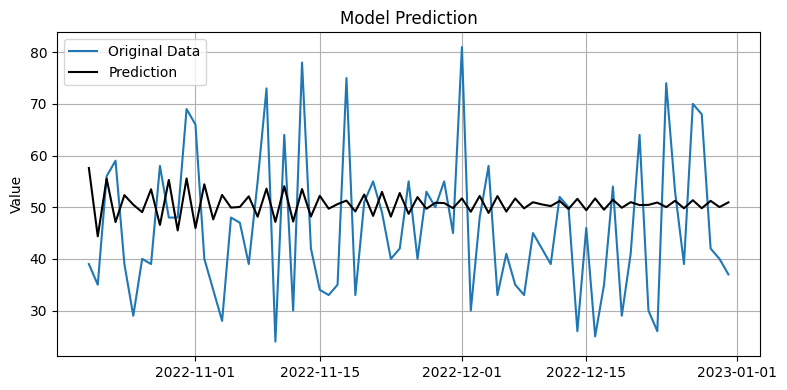

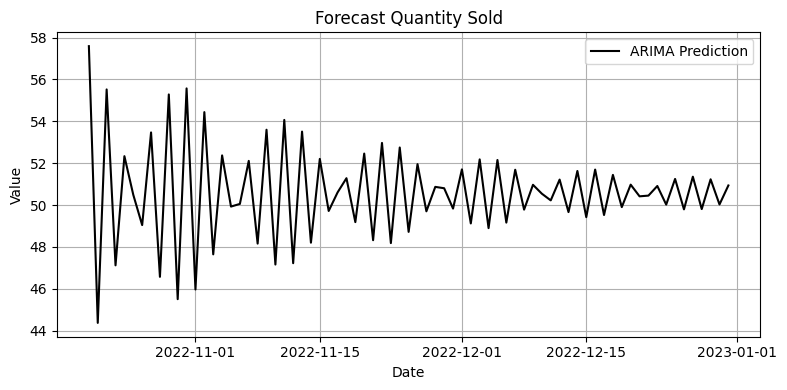

In [58]:
# Plot Original Data and Prediction
plt.figure(figsize=(8, 4))
plt.plot(y_test.index, y_test, label='Original Data')
plt.plot(y_test.index, predictions, color='black', label='Prediction')
plt.ylabel('Value')
plt.title('Model Prediction')
plt.legend()
plt.tight_layout()

# Plot ARIMA Prediction
plt.figure(figsize=(8, 4))
plt.plot(y_test.index, predictions, color='black', label='ARIMA Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast Quantity Sold')
plt.legend()
plt.tight_layout()

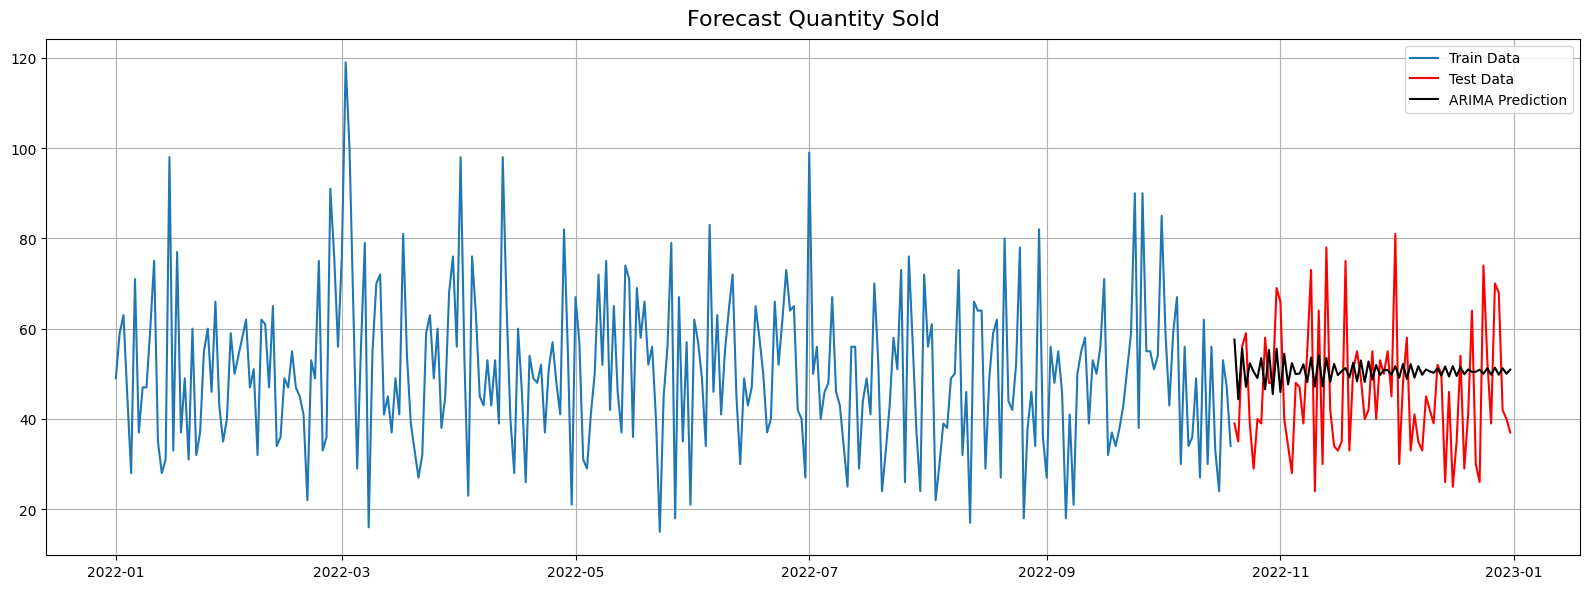

In [59]:
# Plot the prediction results
plt.figure(figsize=(16, 6))
plt.plot(y_train, label='Train Data')
plt.plot(y_test, color='red', label='Test Data')
plt.plot(predictions, color='black', label='ARIMA Prediction')
plt.title('Forecast Quantity Sold', fontsize=16, pad=10);
plt.legend()
plt.tight_layout()

In [60]:
predictions.describe()

count    73.000000
mean     50.615979
std       2.374546
min      44.370748
25%      49.421163
50%      50.542999
75%      51.953552
max      57.591212
Name: predicted_mean, dtype: float64

- Maka hasil prediksi bahwa rata-rata jumlah terjual per hari adalah 50.6 atau sekitar 51

,Crackers,Oat,Thai Tea,Choco Bar,Coffee Candy,Yoghurt,Ginger Candy,Cheese Stick,Cashew,Potato Chip
2022-12-31,4.270630,2.232713,8.177957,7.089833,NaN,5.611637,7.009445,4.955239,1.798705,2.693304
2023-01-01,4.510776,2.984536,8.113921,5.866347,5.078197,4.929329,7.147772,4.978128,2.050480,2.477286
2023-01-02,4.442286,2.567272,8.056793,6.510630,5.455853,5.677931,7.057637,4.978447,2.029656,3.214132
2023-01-03,4.653320,2.469314,8.009018,7.513407,5.835647,5.018050,7.143231,4.978524,1.766324,3.519851
2023-01-04,4.566921,2.820053,7.967997,6.607175,6.146561,5.606514,7.089702,4.978522,1.476414,2.835798
...,...,...,...,...,...,...,...,...,...,...
2023-03-09,4.927501,2.632395,7.732342,6.638500,5.692778,5.329394,7.160057,4.978523,1.722933,2.794791
2023-03-10,4.989982,2.632395,7.732340,6.964754,5.690105,5.329064,7.160058,4.978523,1.767916,3.207338
2023-03-11,4.928294,2.632395,7.732339,6.638002,5.690193,5.329358,7.160058,4.978523,1.769256,3.207465
2023-03-12,4.989204,2.632395,7.732339,6.414264,5.692705,5.329096,7.160059,4.978523,1.728159,2.802710


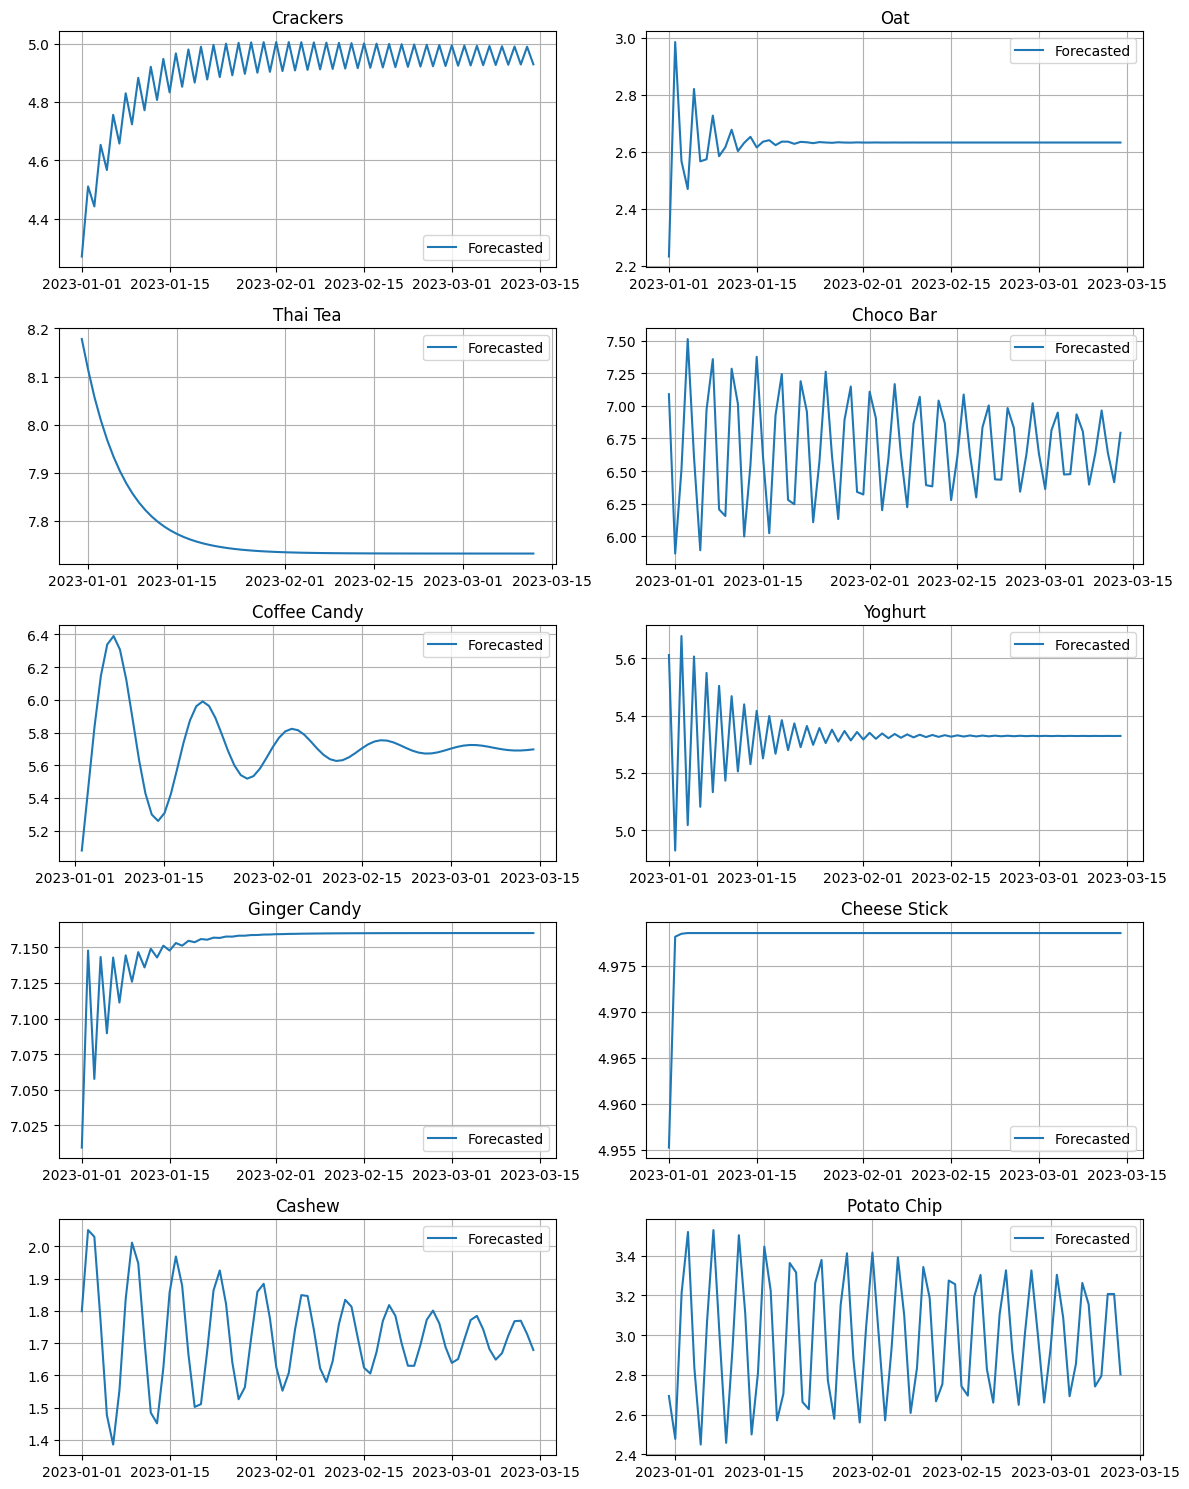

In [61]:
df_predictions = pd.DataFrame()
unique_product = df['product_name'].unique()

rows = math.ceil(len(unique_product) / 2)
cols = 2

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(12, rows * 3))

for i, product in enumerate(unique_product):
    row = i // cols
    col = i % cols

    df_new = df[df['product_name'] == product]

    df_new['date'] = pd.to_datetime(df_new['date'])
    df_new.set_index('date', inplace=True)
    df_new = df_new.resample('D').sum().fillna(df_new.mean())

    model = ARIMA(df_new['qty'], order=(2, 0, 2))
    model_fit = model.fit()

    forecast = model_fit.get_forecast(steps=len(X_test))
    forecast_mean = forecast.predicted_mean

    # create a date range for the forecasted period
    forecast_dates = pd.date_range(start=df_new.index[-1] + pd.DateOffset(1), periods=len(X_test), freq='D')

    # add forecasted values to dataframe
    df_predictions[product] = forecast_mean
    df_predictions.index = forecast_dates

    axs[row, col].plot(df_predictions.index, df_predictions[product], label='Forecasted')
    axs[row, col].set_title(product)
    axs[row, col].legend()

plt.tight_layout()

df_predictions

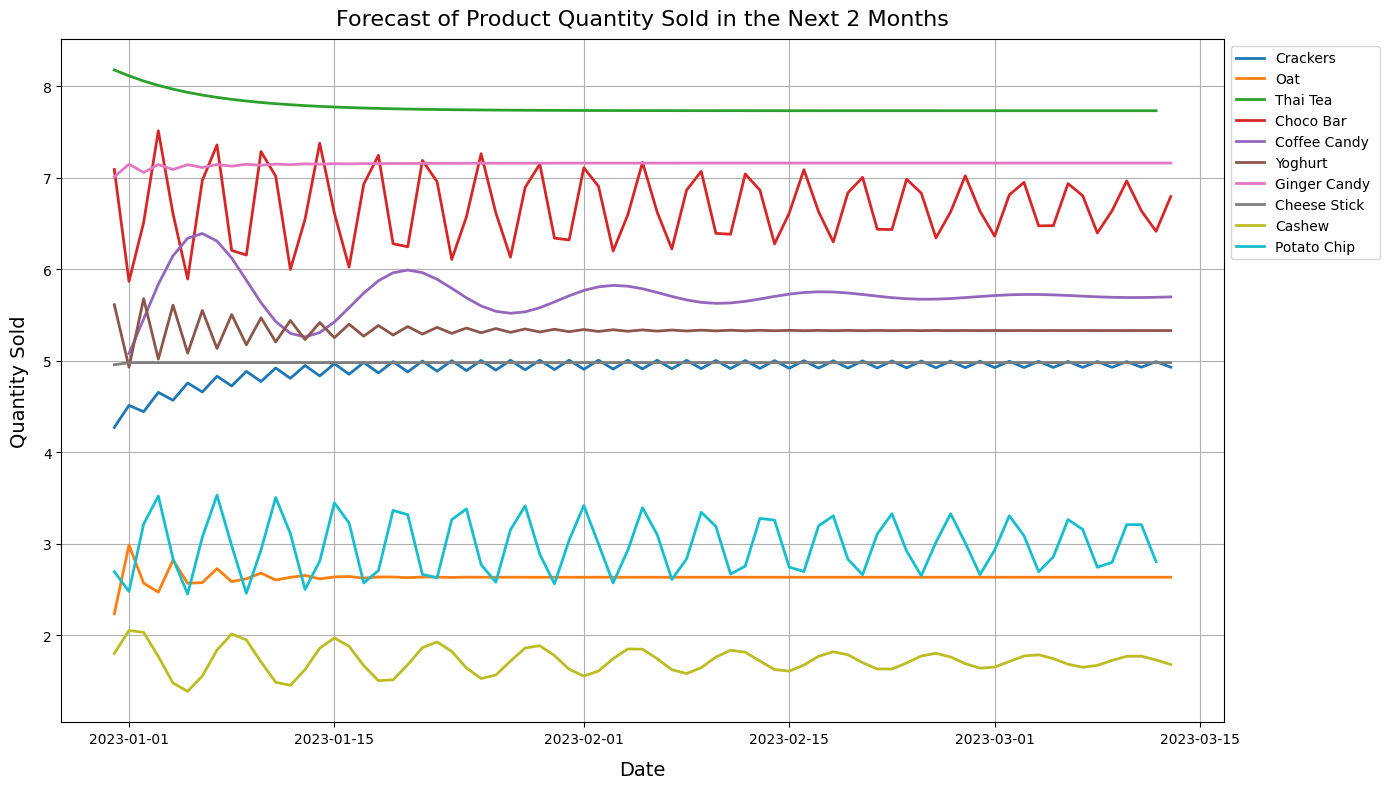

In [62]:
plt.figure(figsize=(14, 8))
plt.plot(df_predictions, lw=2)
plt.legend(df_predictions.columns, bbox_to_anchor=(1, 1))
plt.ylabel('Quantity Sold', fontsize=14, labelpad=10)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.title('Forecast of Product Quantity Sold in the Next 2 Months', fontsize=16, pad=10)
plt.tight_layout()

In [63]:
df_predictions.describe()

,Crackers,Oat,Thai Tea,Choco Bar,Coffee Candy,Yoghurt,Ginger Candy,Cheese Stick,Cashew,Potato Chip
count,73.000000,73.000000,72.000000,73.000000,72.000000,73.000000,73.000000,73.000000,73.000000,72.000000
mean,4.902009,2.630191,7.774294,6.676708,5.716989,5.330134,7.151595,4.978197,1.720495,2.983716
std,0.137511,0.071933,0.092077,0.387464,0.215152,0.107480,0.023308,0.002725,0.136400,0.305083
min,4.270630,2.232713,7.732339,5.866347,5.078197,4.929329,7.009445,4.955239,1.385302,2.448789
25%,4.896203,2.632284,7.732422,6.382001,5.646748,5.323023,7.154613,4.978523,1.629657,2.702161
50%,4.924107,2.632395,7.733858,6.628169,5.702138,5.329330,7.159654,4.978523,1.716550,2.986646
75%,4.995050,2.632416,7.758467,6.970652,5.756531,5.336173,7.160033,4.978523,1.800751,3.258108
max,5.005234,2.984536,8.177957,7.513407,6.390027,5.677931,7.160059,4.978524,2.050480,3.529556


In [64]:
df_mean_value_products = df_predictions.mean().round().astype(int).sort_values(ascending=False)
df_mean_value_products

Thai Tea         8
Choco Bar        7
Ginger Candy     7
Coffee Candy     6
Crackers         5
Yoghurt          5
Cheese Stick     5
Oat              3
Potato Chip      3
Cashew           2
dtype: int64

In [65]:
print('Number of Products per Day:', df_mean_value_products.sum())

Number of Products per Day: 51


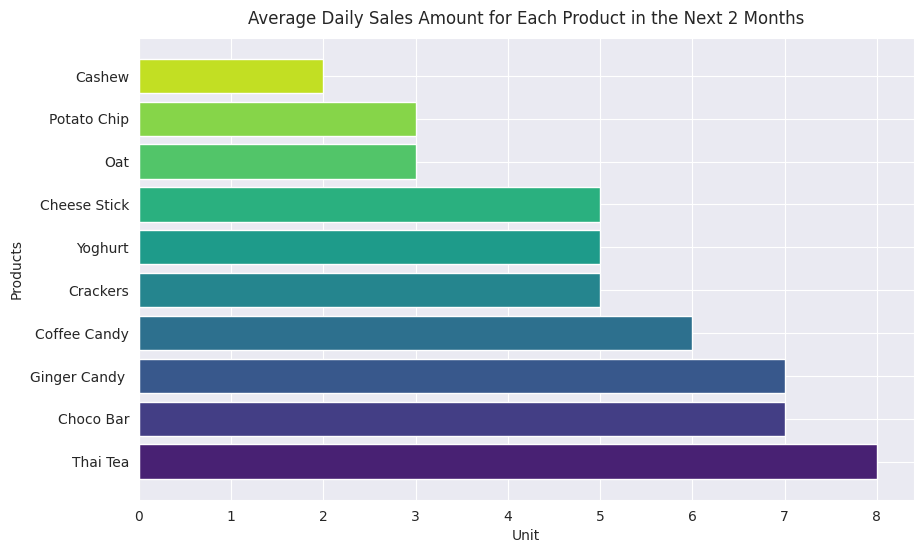

In [66]:
df_mean_value_products_sorted = df_mean_value_products.sort_values(ascending=False)
palette = sns.color_palette("viridis", len(df_mean_value_products_sorted))

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

for i, value in enumerate(df_mean_value_products_sorted):
    plt.barh(df_mean_value_products_sorted.index[i], value,
             color=palette[i], label=df_mean_value_products_sorted.index[i])

plt.xlabel('Unit')
plt.ylabel('Products')
plt.title('Average Daily Sales Amount for Each Product in the Next 2 Months',
          pad=10);

## Conclusion and Recommendation

**Conclusion**
- Based on the time series prediction results, the average number of products sold per day is 51.
- The product with the highest sales is Thai Tea, with an average quantity of 8 per day, followed by Choco Bar and Ginger Candy, with an average quantity of 7 per day.
- The product with the lowest sales is cashew, with an average of 2 per day.

**Recommendation**
- Increasing the daily stock of Thai Tea, Choco Bar and Ginger Candy products to meet high customer demand.

- Additionally, the lowest-selling products, such as Cashew, can be evaluated to determine whether there are opportunities to increase sales with marketing strategies or changes in product packaging or presentation.

# CLUSTERING

In [67]:
df.head()

,transaction_id,customer_id,date,product_id,price,qty,total_amount,store_id,age,gender,marital_status,income,product_name,store_name,group_store,type,latitude,longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  4976 non-null   object        
 1   customer_id     4976 non-null   int64         
 2   date            4976 non-null   datetime64[ns]
 3   product_id      4976 non-null   object        
 4   price           4976 non-null   int64         
 5   qty             4976 non-null   int64         
 6   total_amount    4976 non-null   int64         
 7   store_id        4976 non-null   int64         
 8   age             4976 non-null   int64         
 9   gender          4976 non-null   int64         
 10  marital_status  4976 non-null   object        
 11  income          4976 non-null   float64       
 12  product_name    4976 non-null   object        
 13  store_name      4976 non-null   object        
 14  group_store     4976 non-null   object        
 15  type

In [69]:
df.describe()

,customer_id,price,qty,total_amount,store_id,age,gender,income,latitude,longitude
count,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000
mean,220.597267,9690.293408,3.642484,32268.629421,7.492162,40.079582,0.448151,8.649224,-2.944228,109.602110
std,128.735807,4601.844969,1.855968,19661.512914,4.027835,12.862586,0.497354,6.536447,4.321477,8.368621
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,-7.797068,95.323753
25%,108.750000,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,4.250000,-6.914864,104.756554
50%,220.000000,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,7.720000,-5.135399,110.370529
75%,330.000000,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,10.840000,0.533505,114.590111
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,72.000000,1.000000,71.300000,5.548290,128.190643


In [70]:
df_cluster = df.groupby(['customer_id']).agg({ 'transaction_id': 'count',
                                              'qty': 'sum',
                                               'total_amount': 'sum'
                                               }).reset_index()

In [71]:
df_cluster

,customer_id,transaction_id,qty,total_amount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
439,442,13,37,269400
440,444,18,62,577700
441,445,18,68,587200
442,446,11,42,423300


In [72]:
data_cluster = df_cluster.drop(columns=['customer_id'])
data_cluster.head(1)

,transaction_id,qty,total_amount
0,17,60,623300


In [73]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   transaction_id  444 non-null    int64
 1   qty             444 non-null    int64
 2   total_amount    444 non-null    int64
dtypes: int64(3)
memory usage: 10.5 KB


In [74]:
data_cluster.isnull().sum()

transaction_id    0
qty               0
total_amount      0
dtype: int64

## Standardization

In [75]:
s_scaler = StandardScaler()
df_cluster_scaled = s_scaler.fit_transform(data_cluster)

In [76]:
df_cluster_scaled

array([[ 1.78828224,  1.50893374,  2.10242393],
       [ 0.55344971,  1.27289149,  0.24634281],
       [ 1.17086598,  1.19421074,  0.67942841],
       ...,
       [ 2.09699037,  2.13837973,  1.81236104],
       [-0.06396655,  0.09268025,  0.49542729],
       [ 0.55344971,  0.09268025,  0.62398702]])

In [77]:
df_culster_scaled = pd.DataFrame(df_cluster_scaled, columns=data_cluster.columns)

In [78]:
df_culster_scaled

,transaction_id,qty,total_amount
0,1.788282,1.508934,2.102424
1,0.553450,1.272891,0.246343
2,1.170866,1.194211,0.679428
3,-0.372675,0.407403,-0.475199
4,-1.298799,-1.087531,-0.747585
...,...,...,...
439,0.553450,-0.300723,-0.741157
440,2.096990,1.666295,1.736029
441,2.096990,2.138380,1.812361
442,-0.063967,0.092680,0.495427


## Elbow Method

In [79]:
clusters = []
k_range = range(1, 11)

# Finding the optimal number of clusters using the elbow method
for k in k_range:
  model = KMeans(n_clusters=k, n_init=10, random_state=42)
  model.fit(df_cluster_scaled)
  clusters.append(model.inertia_)

print([int(round(cluster)) for cluster in clusters])

[1332, 543, 317, 238, 191, 170, 154, 140, 131, 121]


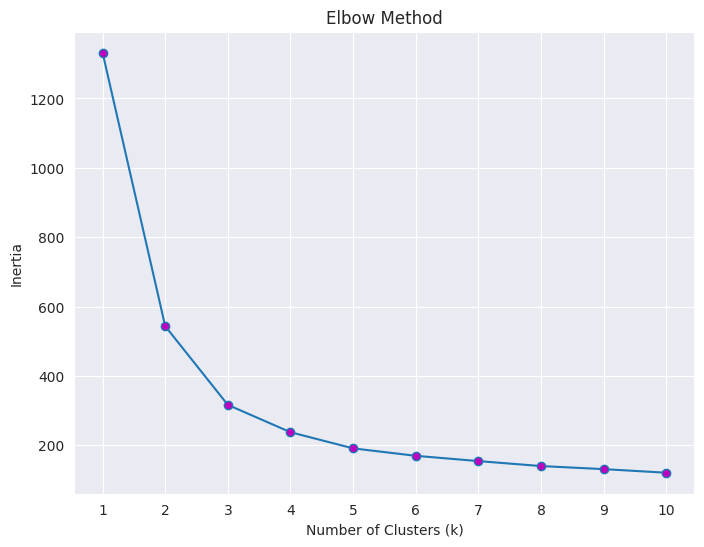

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, clusters, marker='o', markerfacecolor= 'm')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(list(k_range));

- Pada plot diatas bahwa cluster terbaik adalah 3

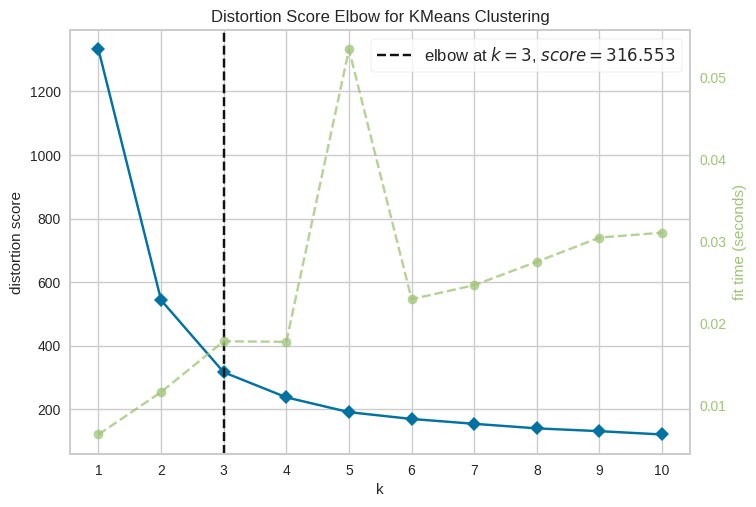

In [81]:
from yellowbrick.cluster import KElbowVisualizer

# Determine the best number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(df_cluster_scaled)
plt.xticks(list(k_range))
visualizer.show();

## K-Means Model

In [82]:
# The best cluster is 3
model_km3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
model_km3.fit(df_cluster_scaled)
df_cluster['cluster'] = model_km3.labels_

In [83]:
df_cluster

,customer_id,transaction_id,qty,total_amount,cluster
0,1,17,60,623300,2
1,2,13,57,392300,2
2,3,15,56,446200,2
3,4,10,46,302500,1
4,5,7,27,268600,0
...,...,...,...,...,...
439,442,13,37,269400,1
440,444,18,62,577700,2
441,445,18,68,587200,2
442,446,11,42,423300,1


In [84]:
df_cluster.describe()

,customer_id,transaction_id,qty,total_amount,cluster
count,444.000000,444.000000,444.000000,444.000000,444.000000
mean,223.556306,11.207207,40.822072,361641.216216,0.936937
std,128.475517,3.242960,12.723926,124596.157539,0.736403
min,1.000000,3.000000,10.000000,92100.000000,0.000000
25%,112.750000,9.000000,32.000000,270675.000000,0.000000
50%,223.500000,11.000000,40.000000,353200.000000,1.000000
75%,334.250000,13.000000,50.000000,439750.000000,1.000000
max,447.000000,21.000000,79.000000,846700.000000,2.000000


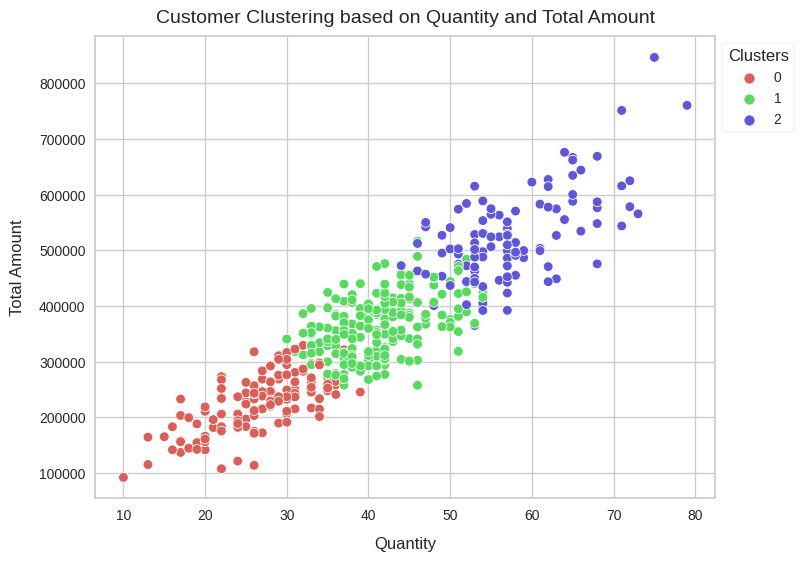

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x='qty', y='total_amount', hue='cluster',
                palette=sns.color_palette('hls', 3))

plt.title('Customer Clustering based on Quantity and Total Amount', fontsize=14, pad=10)
plt.xlabel('Quantity', fontsize=12, labelpad=10)
plt.ylabel('Total Amount', fontsize=12, labelpad=10)
plt.legend(title='Clusters', bbox_to_anchor=(1, 1), frameon=True);

In [86]:
df_cluster[df_cluster['cluster'] == 2]

,customer_id,transaction_id,qty,total_amount,cluster
0,1,17,60,623300,2
1,2,13,57,392300,2
2,3,15,56,446200,2
6,7,17,57,498800,2
7,8,14,47,542100,2
...,...,...,...,...,...
427,430,14,53,501600,2
431,434,13,57,509900,2
435,438,14,47,457200,2
440,444,18,62,577700,2


In [87]:
cluster_summary = df_cluster.groupby(['cluster']).agg({
    'customer_id': 'count',
    'transaction_id': 'mean',
    'qty': 'mean',
    'total_amount': 'mean'
}).round()

In [88]:
cluster_summary.rename(columns={
    'customer_id': 'Total Customers',
    'transaction_id': 'Average Transaction ID',
    'qty': 'Average Quantity',
    'total_amount': 'Average Total Amount'
}, inplace=True)

In [89]:
cluster_summary

,Total Customers,Average Transaction ID,Average Quantity,Average Total Amount
cluster,,,,
0,135,8.0,27.0,229389.0
1,202,11.0,41.0,363267.0
2,107,15.0,58.0,525432.0


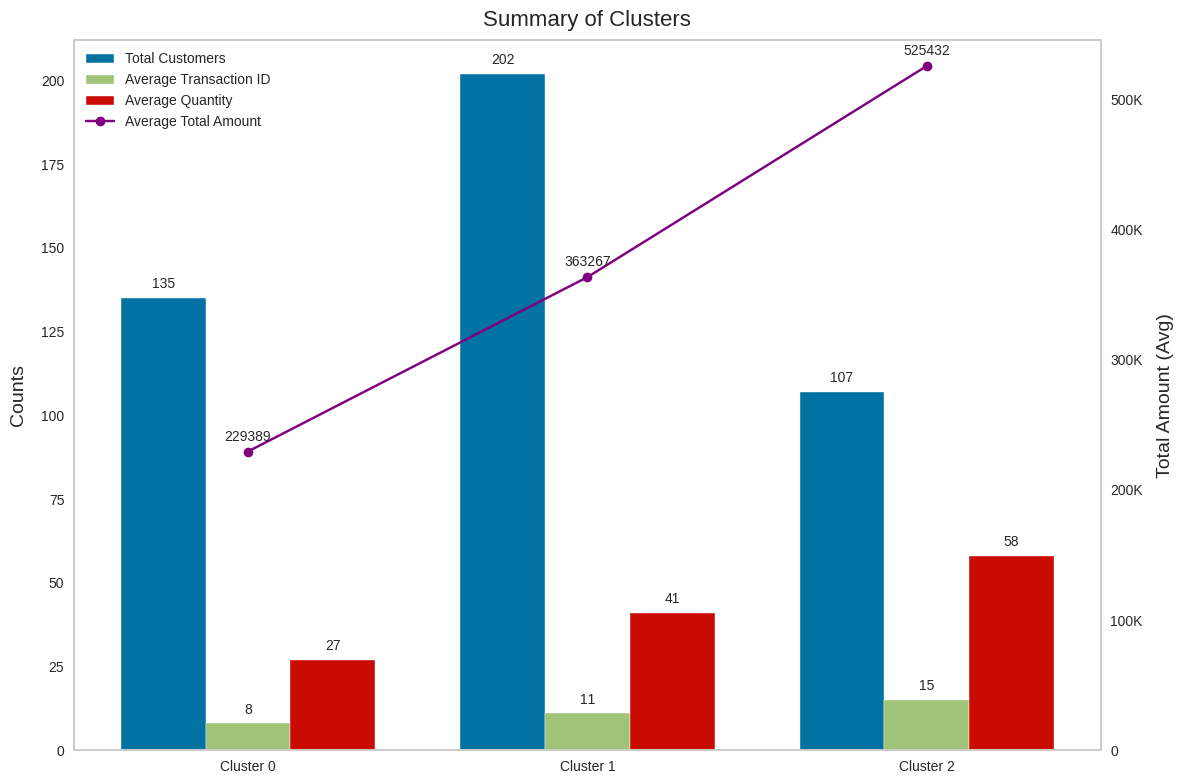

In [90]:
plt.rc('axes', grid=False)

x_arange = np.arange(len(cluster_summary))
width_bar = 0.25

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting for Total Customers, Average Transaction ID and Average Quantity
for i, metric in enumerate(cluster_summary.columns[0:3]):
    ax.bar(
        x_arange + i*width_bar,
        cluster_summary[metric],
        width_bar,
        label=f'{metric}'
    )
    for j, val in enumerate(cluster_summary[metric]):
        ax.text(j + i*width_bar, val + 2, int(val), ha='center', va='bottom', fontsize=10)

# Plotting Average Total Amount
x_arange_amount = [0.25, 1.25, 2.25]
ax2 = ax.twinx()
ax2.plot(x_arange_amount, cluster_summary['Average Total Amount'],
         color='purple', marker='o', label=cluster_summary.columns[3])
for i, val in enumerate(cluster_summary['Average Total Amount']):
    ax2.text(i + 0.25, val + 6_000, int(val), ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Counts', labelpad=10, fontsize=14)
ax2.set_ylabel('Total Amount (Avg)', labelpad=10, fontsize=14)
plt.title('Summary of Clusters', pad=10, fontsize=16)

# Equalized the position of the x_arange axis and added labels.
ax.set_xticks(x_arange + width_bar)
ax.set_xticklabels(f'Cluster {label}' for label in cluster_summary.index)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# The y-axis value on the second axis
ax2.set_ylim([0, cluster_summary['Average Total Amount'].max() + 20_000])
ax2.set_yticklabels([f'{int(x)}' if x < 1000 else f'{int(x/1000)}K' for x in ax2.get_yticks()])

plt.tight_layout()

## Conclusion and Recommendation

**Conclusion**
- Based on the clustering prediction results, there are 3 customer segments.

- Segment 0 has 135 customers with an average of 8 transactions per customer, 27 average items per transaction, and an average total purchase of Rp 229.389.

- Segment 1 has 202 customers with an average of 11 transactions per customer, 41 average items per transaction, and an average total purchase of Rp 363.267.

- Segment 2 has 107 customers with an average of 15 transactions per customer, 58 average items per transaction, and an average total purchase of Rp 525.432.

**Recommendation**
- Segment 0: Customers in this segment have a low transaction frequency, a moderate number of items per transaction, and relatively low total purchases. The recommendation for this segment is to provide special promotions or discounts to encourage customers to make more transactions.

- Segment 1: Customers in this segment have a moderate frequency of transactions, a high number of items per transaction, and a moderate total purchase. The recommendation for this segment is to provide promotions that focus on increasing the number of items per transaction, such as product bundling or special offers for purchases of a certain amount.

- Segment 2: Customers in this segment have high transaction frequency, a high number of items per transaction, and high total purchases. The recommendation for this segment is to provide promotions that focus on customer rewards and recognition, such as loyalty programs or special discounts for loyal customers.